Brand                   object
Model                   object
Power                  float64
Mileage                float64
Fuel                    object
Price                  float64
Vehicle_Age              int32
Brand_encoded          float64
Model_encoded          float64
Transmission_Manual      int32
Fuel_encoded           float64
dtype: object

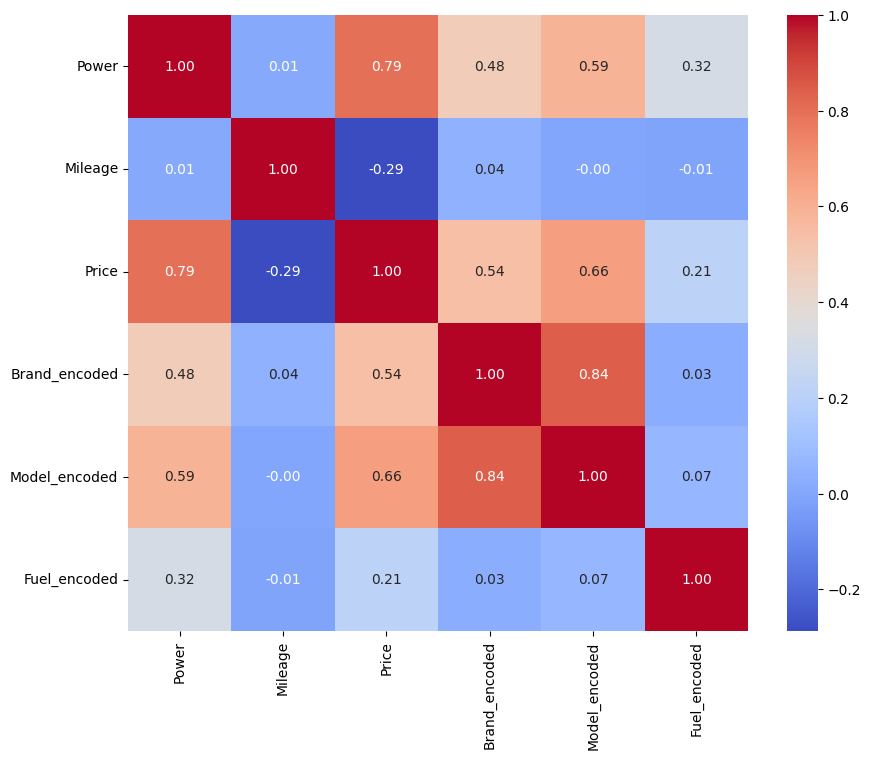

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
import pandas as pd

df = pd.read_parquet("../PreprocessedData/dataLog.parquet")
df['Transmission_Manual'] = df['Transmission_Manual'].astype(int)

display(df.dtypes)

numerical_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numerical_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

high_corr_features = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.9 and column != 'Price')]
print("Yüksek korelasyona sahip özellikler:", high_corr_features)

df = df.drop(columns=high_corr_features)
